# EDA scrapbook

In [89]:
import pandasql as ps
from datetime import datetime
from pandasql import sqldf
from datetime import timedelta
from datetime import date
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#from sklearn.pipeline import make_pipeline

from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score

#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

#from sklearn.model_selection import KFold
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.tree import export_graphviz
#from sklearn.pipeline import make_pipeline
#from sklearn.datasets import make_blobs

#from requests import get
#from requests.exceptions import RequestException
#from contextlib import closing
#from urllib.request import urlopen
#from bs4 import BeautifulSoup
#import requests



#from sklearn.utils import resample
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import AdaBoostClassifier
#from sklearn.linear_model import LogisticRegressionCV

#from sklearn.metrics import accuracy_score
#from sklearn.metrics import confusion_matrix
#from sklearn.preprocessing import Imputer
#from sklearn.metrics import mean_squared_error
#from sklearn.model_selection import train_test_split
#from IPython.display import display


#from sklearn.decomposition import PCA

#from sklearn.preprocessing import PolynomialFeatures
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.model_selection import train_test_split


### Look at rank vs outcome

In [90]:
def plot_outcomes(df, alpha, emphasis):
    
    fig , ax = plt.subplots(figsize = (10,10))
    
    ax.scatter(df[df['outcome_num'] == 0]['home_rank_pts'],\
               df[df['outcome_num'] == 0]['away_rank_pts'],\
                label = 'Win',\
                alpha = [1 if emphasis == 0 else alpha][0], \
                color = 'green')

    ax.scatter(df[df['outcome_num'] == 1]['home_rank_pts'],\
               df[df['outcome_num'] == 1]['away_rank_pts'],\
                label = 'Draw',\
                alpha = [1 if emphasis == 1 else alpha][0], \
                color = 'blue')
    
    ax.scatter(df[df['outcome_num'] == 2]['home_rank_pts'],\
               df[df['outcome_num'] == 2]['away_rank_pts'],\
                label = 'Loss',\
                alpha = [1 if emphasis == 2 else alpha][0], \
                color = 'red')

    ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
    plt.xlabel('Home Rank (points)', fontsize = 20)
    plt.ylabel('Away Rank (points)', fontsize = 20)

    plt.title('2018 World Cup Match Outcomes', fontsize = 20)
    #plt.legend(loc = 'lower right')
    plt.legend(fontsize=20)
    #plt.show()
    
    return fig, ax


In [91]:
df = pd.read_csv('data/team/project_data.csv')

In [92]:
df['date'] = df.date.astype('datetime64')

In [93]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_rank,home_rank_pts,away_rank,away_rank_pts,rank_diff,rank_pts_diff,outcome,outcome_num,home_game,away_game
0,2010-05-26,Hungary,Italy,6,1,Friendly,Budapest,Hungary,0,57,565,5,1184,52,-619,W,0,1,0
1,2010-05-27,Argentina,Chile,3,1,Friendly,Buenos Aires,Argentina,0,7,1076,18,888,-11,188,W,0,1,0
2,2010-05-29,Chile,Uruguay,0,3,Friendly,Buenos Aires,Argentina,1,18,888,16,899,2,-11,L,2,0,0
3,2010-06-05,Argentina,Chile,5,1,Friendly,Buenos Aires,Argentina,0,7,1076,18,888,-11,188,W,0,1,0
4,2010-06-12,Argentina,Uruguay,4,1,Friendly,Buenos Aires,Argentina,0,7,1076,16,899,-9,177,W,0,1,0


[]

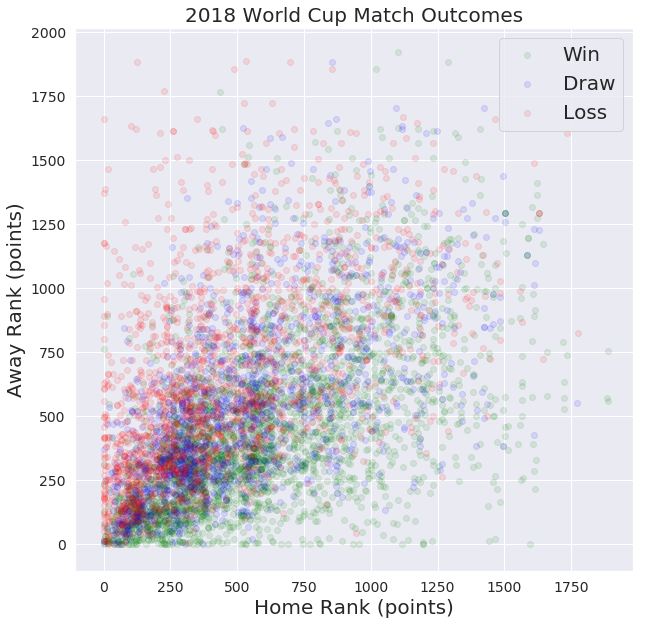

In [94]:
fig , ax = plot_outcomes(df,0.1,-2) 

plt.plot()

/Users/paul/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


[]

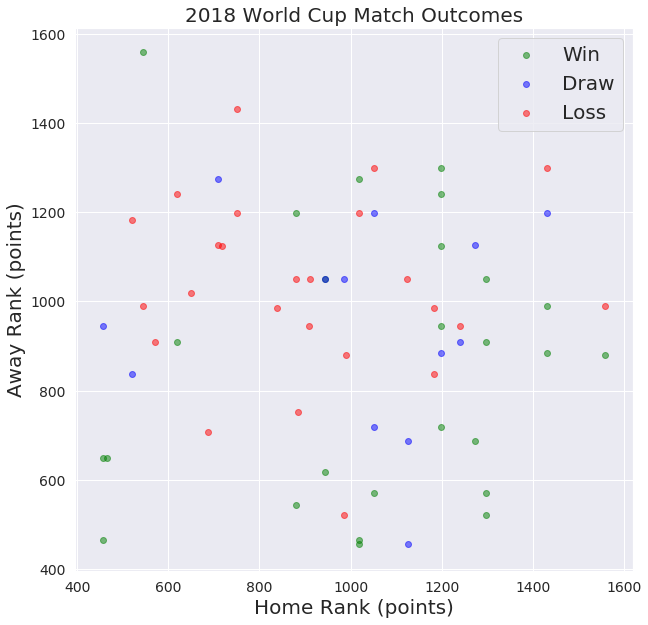

In [95]:
wc_df = df[(df['tournament'] == 'FIFA World Cup') & (df['date'] > date(2018,1,1))]

fig , ax = plot_outcomes(wc_df,0.5, -1) 

plt.plot()

### Look at past history

In [96]:
rec_df = pd.read_csv('data/team/new_intl_results.csv')

In [97]:
rec_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [98]:
rec_df['date'] = rec_df.date.astype('datetime64')
rec_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33500 entries, 0 to 33499
Data columns (total 9 columns):
date          33500 non-null datetime64[ns]
home_team     33500 non-null object
away_team     33500 non-null object
home_score    33500 non-null int64
away_score    33500 non-null int64
tournament    33500 non-null object
city          33500 non-null object
country       33500 non-null object
neutral       33500 non-null bool
dtypes: bool(1), datetime64[ns](1), int64(2), object(5)
memory usage: 2.1+ MB


In [99]:
rec_df['result'] = np.sign(rec_df['home_score'] - rec_df['away_score'])

In [100]:
rec_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1


In [ ]:
# find unique match-ups
x = rec_df.groupby(['home_team' , 'away_team']).size().reset_index().rename(columns={0:'count'})

In [ ]:
rec_df.sort_values('date', ascending = True, inplace= True)


In [ ]:
#Zimbabwe - Zambia

matchups = {}
matchup_idx = 0

for idx, match in rec_df.iterrows():
    #if True:
    if (match['home_team'] == 'Argentina') & (match['away_team'] == 'Brazil'):

        #temp_df = pd.DataFrame()
        
        temp_df = rec_df[ \
               (rec_df['date'] < match['date']) &\
               (rec_df['date'] > (match['date'] - timedelta(days = 10 * 365) ) ) &\
               (rec_df['home_team'] == match['home_team']) &\
               (rec_df['away_team'] == match['away_team']) \
              ]
        
        prev_rec = temp_df['result'][-5:].mean()
        
        matchups[matchup_idx] = {}
        
        
        
        matchup_nbr += 1
        

In [ ]:
matchup_df.head(100)

In [ ]:
#temp_df

In [ ]:
#rec_df['vs_window'] = rec_df['home_team'] + '-' + rec_df['away_team']

In [ ]:
rec_gf = rec_df.groupby(['home_team' , 'away_team'])

In [ ]:
y = rec_gf.result.rolling(5,min_periods = 1).mean()

In [ ]:
y.loc['Argentina','Brazil']

In [ ]:
exp_12=df.ewm(span=20,min_period=12,adjust=False).mean()

In [ ]:
rec_df.head()

In [ ]:
#rec_df.set_index('vs_window' , inplace=True, drop=True)

In [ ]:
#rec_df.head()

In [ ]:
window_df = rec_df[['result']]

In [ ]:
window_df.head()

In [ ]:
window_df.rolling(5, min_periods=None).mean()

In [ ]:
rec_df.head(20)

In [ ]:
len(rec_df)

In [ ]:
x.apply(np.mean(rec_df['result']))

In [ ]:
X = df[['home_rank_pts' , 'away_rank_pts']].values
y = df['outcome_num'].values

In [ ]:
log_res_cv = LogisticRegressionCV(multi_class="multinomial" ,\
                                  cv = 5 ,\
                                  penalty = 'l2',\
                                  Cs = 1000)


polynomial_logreg_estimator = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    log_res_cv
    #OneVsRestClassifier(log_res_cv)
)

In [ ]:
model = log_res_cv
fit = model.fit(X , y)

In [ ]:
accuracy_score(y,model.predict(X))

In [ ]:
cross_val_score(model , X , y , cv = 5)